# Regression Model Development and Analysis # 
by Sarah Medina

In [1]:
#importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import sklearn.linear_model # linear models

#sklearn and train test split
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression

#Knn Neighbors
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler
# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = 'Apprentice_Chef_Dataset.xlsx'

# reading the file into Python
chefset = pd.read_excel(io = file)


#pd set option to see all the column names 
pd.set_option('display.max_columns', None)
chefset.head()


,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


In [2]:
#formatting and printing the dimensions of the dataset by looking at shapes
#Columns, Rows
print(f"""
Size of Original Dataset
------------------------
Observations: {chefset.shape[0]}
Features:     {chefset.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     28



In [3]:
#working with emails (categoricals) first
#we want to seperate email domains before making dummie vars
#import libraries
import random as rand 
import gender_guesser.detector as gender

# setting random seed
rand.seed(a = 327)

# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in chefset.iterrows():
    
    # splitting email domain at '@'
    split_email = chefset.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df

,0,1
0,saathos,unitedhealth.com
1,alysanne.osgrey,ge.org
2,edwyd.fossoway,jnj.com
3,eleyna.westerling,ge.org
4,elyn.norridge,jnj.com
...,...,...
1941,obara.sand,yahoo.com
1942,quentyn.blackwood,yahoo.com
1943,rhonda.rowan,gmail.com
1944,turnip,yahoo.com


In [4]:
# STEP 2: concatenating with original DataFrame

# safety measure in case of multiple concatenations
chefset = pd.read_excel(file)


# renaming column to concatenate
email_df.columns = ['0' , 'EMAIL_domains']


# concatenating personal_email_domain with friends DataFrame
chefset = pd.concat([chefset, email_df['EMAIL_domains']],
                     axis = 1)


# printing value counts of personal_email_domain
chefset.loc[: ,'EMAIL_domains'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
cocacola.com         28
jnj.com              28
mcdonalds.com        28
merck.com            28
apple.com            27
nike.com             27
ge.org               26
ibm.com              26
dupont.com           26
microsoft.com        25
chevron.com          25
exxon.com            24
unitedhealth.com     24
travelers.com        24
boeing.com           23
verizon.com          22
pg.com               22
caterpillar.com      22
mmm.com              22
walmart.com          21
disney.com           21
visa.com             20
pfizer.com           20
jpmorgan.com         19
cisco.com            18
goldmansacs.com      18
unitedtech.com       18
intel.com            17
homedepot.com        17
Name: EMAIL_domains, dtype: int64

In [5]:
#STEP 3: splittling the domains at "."
# email domain types
# creating a list for email names with no dots to rduce error
dot_lst = []

# looping over each email address
for index, col in chefset.iterrows():
    
    # splitting email domain at '.'
    email_dot = chefset.loc[index, 'EMAIL_domains'].split(sep = '.')
    
    # appending dot_lst with the results
    dot_lst.append(email_dot)
    

# converting _df into a DataFrame 
emailclean_df = pd.DataFrame(dot_lst)


# displaying the results
emailclean_df

,0,1
0,unitedhealth,com
1,ge,org
2,jnj,com
3,ge,org
4,jnj,com
...,...,...
1941,yahoo,com
1942,yahoo,com
1943,gmail,com
1944,yahoo,com


In [6]:
# STEP 4 : CLEAN EMAIL DOMAINS IN A NEW COLUMN IN CHEFSET

# safety measure in case of multiple concatenations
chefset = pd.read_excel(file)


# renaming column to concatenate
emailclean_df.columns = ['CLEAN_EMAILS' , '1']


# concatenating personal_email_domain with chefset DataFrame
#adds the column to the dataset
chefset = pd.concat([chefset, emailclean_df['CLEAN_EMAILS']],
                   axis = 1)


# printing value counts of personal_email_domain
chefset.loc[: ,'CLEAN_EMAILS'].value_counts()

gmail           303
protonmail      284
yahoo           274
msn              72
aol              69
passport         64
hotmail          63
live             62
me               59
amex             30
mcdonalds        28
cocacola         28
merck            28
jnj              28
nike             27
apple            27
ibm              26
ge               26
dupont           26
chevron          25
microsoft        25
travelers        24
unitedhealth     24
exxon            24
boeing           23
mmm              22
verizon          22
pg               22
caterpillar      22
walmart          21
disney           21
visa             20
pfizer           20
jpmorgan         19
cisco            18
unitedtech       18
goldmansacs      18
homedepot        17
intel            17
Name: CLEAN_EMAILS, dtype: int64

In [7]:
#Aggregating personal and work emails into 2 groups 
#values for some emails are less than 100 observations so we aggregate

# email domain types, personal and work
personal_emails = ['gmail','protonmail','yahoo','msn',
                          'aol','hotmail','live','me']

work_emails  = ['passport','amex','cocacola','jnj','merck',
                       'mcdonalds','nike','apple','dupont','ibm',
                       'ge','microsoft','chevron','travelers',
                       'exxon','unitedhealth','boeing','caterpillar',
                       'mmm','pg','verizon','walmart','disney',
                       'pfizer','visa','jpmorgan','unitedtech',
                       'cisco','goldmansacs','intel','homedepot']

# placeholder list
email_lst = []


# looping to group observations by domain type
for domain in chefset['CLEAN_EMAILS']:
    
        if domain in personal_emails:
            email_lst.append('personal')
            
        elif domain in work_emails:
            email_lst.append('work')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
chefset['DOMAIN_GROUP'] = pd.Series(email_lst)


# checking results
chefset['DOMAIN_GROUP'].value_counts()

personal    1186
work         760
Name: DOMAIN_GROUP, dtype: int64

In [8]:
# one hot encoding categorical variables
one_hot_DOMAIN_GROUP    = pd.get_dummies(chefset['DOMAIN_GROUP'])

# dropping categorical variables after they've been encoded
chefset= chefset.drop('DOMAIN_GROUP', axis = 1)

# joining codings together
#appending new categorical data
chefset = chefset.join([one_hot_DOMAIN_GROUP ])

# saving new columns
new_columns = chefset.columns

In [9]:
#Describing each quantitative column using descriptive statistics
chefset.describe(include = 'number').round(decimals= 2)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,personal,work
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,150.56,4.44,0.60,2.79,13.51,106.43,0.61,0.39
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,49.45,1.55,0.64,0.76,2.33,181.01,0.49,0.49
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,1.00,0.00,1.00,5.00,0.00,0.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,114.40,3.00,0.00,2.00,12.00,0.00,0.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,145.60,4.00,1.00,3.00,13.00,0.00,1.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,173.78,5.00,1.00,3.00,15.00,174.00,1.00,1.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,564.20,11.00,3.00,5.00,19.00,1600.00,1.00,1.00


In [10]:
#continuing to clean the data

#looking at how many missing values each column has
chefset.isnull().sum(axis=0)

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
CLEAN_EMAILS                    0
personal      

In [11]:
#missing value analysis and imputation
#initiatiating an imputation value for family name
fill= "na"

#imputing 'FAMILY_NAME'
chefset['FAMILY_NAME'] =chefset['FAMILY_NAME'].fillna(fill)

In [12]:
#checking to see if any values are still missing
chefset.isnull().any(axis=0).any(axis=0)

False

In [13]:
#log transforming Revenue and saving it to the dataset
chefset['log_REVENUE'] = np.log10(chefset['REVENUE'])

In [14]:
#changing the name of a column
#largest order size is actually the avg number or meals ordered
chefset.rename(columns={'LARGEST_ORDER_SIZE': 'AVG_NUM_MEALS_ORD'}, inplace=True)

In [15]:
chefset.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'AVG_NUM_MEALS_ORD', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'CLEAN_EMAILS', 'personal', 'work', 'log_REVENUE'], dtype='object')

In [16]:
#subsetting with value counts for variables that have zeros
# counting the number of zeroes for 
tot_meals_zeroes   = len(chefset['TOTAL_MEALS_ORDERED'][chefset['TOTAL_MEALS_ORDERED'] == 0])
avg_site_zeroes    = len(chefset['AVG_TIME_PER_SITE_VISIT'][chefset['AVG_TIME_PER_SITE_VISIT'] == 0])
avg_prep_zeroes    = len(chefset['AVG_PREP_VID_TIME'][chefset['AVG_PREP_VID_TIME'] == 0])
tot_photos_zeroes  = len(chefset['TOTAL_PHOTOS_VIEWED'][chefset['TOTAL_PHOTOS_VIEWED'] == 0])
tot_MC  = len(chefset['MASTER_CLASSES_ATTENDED'][chefset['MASTER_CLASSES_ATTENDED'] == 0])
tot_Mobile  = len(chefset['MOBILE_LOGINS'][chefset['MOBILE_LOGINS'] == 0])
tot_PC  = len(chefset['PC_LOGINS'][chefset['PC_LOGINS'] == 0])
tot_weekly_plan  = len(chefset['WEEKLY_PLAN'][chefset['WEEKLY_PLAN'] == 0])
tot_early  = len(chefset['EARLY_DELIVERIES'][chefset['EARLY_DELIVERIES'] == 0])
tot_late  = len(chefset['LATE_DELIVERIES'][chefset['LATE_DELIVERIES'] == 0])
tot_cancel_b4_noon  = len(chefset['CANCELLATIONS_BEFORE_NOON'][chefset['CANCELLATIONS_BEFORE_NOON'] == 0])
tot_cancel_after_noon = len(chefset['CANCELLATIONS_AFTER_NOON'][chefset['CANCELLATIONS_AFTER_NOON'] == 0])


# printing a table of the results for zero values
print(f"""
                  No\t\tYes
           ---------------------
Total_Meals      | {tot_meals_zeroes}\t\t{len(chefset) - tot_meals_zeroes}
Avg time on site | {avg_site_zeroes}\t\t{len(chefset) - avg_site_zeroes}
Avg prep vid     | {avg_prep_zeroes}\t\t{len(chefset) - avg_prep_zeroes}
Photos Viewed    | {tot_photos_zeroes}\t\t{len(chefset) - tot_photos_zeroes}
Master Class     | {tot_MC}\t\t{len(chefset) - tot_MC}
Mobile Logins    | {tot_Mobile}\t\t{len(chefset) - tot_Mobile}
PC Logins        | {tot_PC}\t\t{len(chefset) - tot_PC}
Weekly Plan      | {tot_weekly_plan}\t\t{len(chefset) - tot_weekly_plan}
Early            | {tot_early}\t\t{len(chefset) - tot_early}
Late             | {tot_late}\t\t{len(chefset) - tot_late}
Calcel 12        | {tot_cancel_b4_noon}\t\t{len(chefset) - tot_cancel_b4_noon}
Cancel after 12  | {tot_cancel_after_noon}\t\t{len(chefset) - tot_cancel_after_noon}

""")


                  No		Yes
           ---------------------
Total_Meals      | 0		1946
Avg time on site | 0		1946
Avg prep vid     | 0		1946
Photos Viewed    | 1140		806
Master Class     | 932		1014
Mobile Logins    | 16		1930
PC Logins        | 0		1946
Weekly Plan      | 468		1478
Early            | 1167		779
Late             | 319		1627
Calcel 12        | 667		1279
Cancel after 12  | 1667		279




In [17]:
# dummy variables for vars with zeros.
chefset['has_viewed_photos']        = 0
chefset['has_MASTER_CLASSES_ATTENDED']        = 0
chefset['has_MOBILE_LOGINS']        = 0
chefset['has_WEEKLY_PLAN']        = 0
chefset['has_EARLY_DELIVERIES']        = 0
chefset['has_LATE_DELIVERIES']        = 0
chefset['has_CANCELLATIONS_BEFORE_NOON']        = 0
chefset['has_CANCELLATIONS_AFTER_NOON']        = 0


#if we're above a threshold, creating a new column 
# iterating over each original column to
# change values in the new feature columns
for index, value in chefset.iterrows():
    
    #total photos viewed
    if chefset.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        chefset.loc[index, 'has_viewed_photos'] = 1
    
    #master claases
    if chefset.loc[index, 'MASTER_CLASSES_ATTENDED'] > 0:
        chefset.loc[index, 'has_MASTER_CLASSES_ATTENDED'] = 1
    #mobile logins    
    if chefset.loc[index, 'MOBILE_LOGINS'] > 0:
        chefset.loc[index, 'has_MOBILE_LOGINS'] = 1
    #weekly plan
    if chefset.loc[index, 'WEEKLY_PLAN'] > 0:
        chefset.loc[index, 'has_WEEKLY_PLAN'] = 1
    #early deliveries
    if chefset.loc[index, 'EARLY_DELIVERIES'] > 0:
        chefset.loc[index, 'has_EARLY_DELIVERIES'] = 1
    #late deliveries
    if chefset.loc[index, 'LATE_DELIVERIES'] > 0:
        chefset.loc[index, 'has_LATE_DELIVERIES'] = 1
    #cancel before 12
    if chefset.loc[index, 'CANCELLATIONS_BEFORE_NOON'] > 0:
        chefset.loc[index, 'has_CANCELLATIONS_BEFORE_NOON'] = 1
    #after 12
    if chefset.loc[index, 'CANCELLATIONS_AFTER_NOON'] > 0:
        chefset.loc[index, 'has_CANCELLATIONS_AFTER_NOON'] = 1

# checking results
chefset[['has_viewed_photos', 'has_MASTER_CLASSES_ATTENDED','has_MOBILE_LOGINS',
         'has_WEEKLY_PLAN', 'has_EARLY_DELIVERIES', 'has_LATE_DELIVERIES', 
         'has_CANCELLATIONS_BEFORE_NOON', 'has_CANCELLATIONS_AFTER_NOON']].head()

,has_viewed_photos,has_MASTER_CLASSES_ATTENDED,has_MOBILE_LOGINS,has_WEEKLY_PLAN,has_EARLY_DELIVERIES,has_LATE_DELIVERIES,has_CANCELLATIONS_BEFORE_NOON,has_CANCELLATIONS_AFTER_NOON
0,0,0,1,0,0,1,1,1
1,1,0,1,1,0,1,0,0
2,0,0,1,1,0,1,1,0
3,0,0,1,1,0,1,1,0
4,1,1,1,1,0,1,0,0


In [18]:
#Log transform interval and count data, saving this new variable to chefset
#creating new log vriables
chefset['log_UNIQUE_MEALS_PURCH'] = np.log10(chefset['UNIQUE_MEALS_PURCH'])
chefset['log_CONTACTS_W_CUSTOMER_SERVICE'] = np.log10(chefset['CONTACTS_W_CUSTOMER_SERVICE'])
chefset['log_PRODUCT_CATEGORIES_VIEWED'] = np.log10(chefset['PRODUCT_CATEGORIES_VIEWED'])
chefset['log_PC_LOGINS'] = np.log10(chefset['PC_LOGINS'])
chefset['log_MEDIAN_MEAL_RATING'] = np.log10(chefset['MEDIAN_MEAL_RATING'])
chefset['log_AVG_CLICKS_PER_VISIT'] = np.log10(chefset['AVG_CLICKS_PER_VISIT'])
chefset['log_AVG_NUM_MEALS_ORD'] = np.log10(chefset['AVG_NUM_MEALS_ORD'])
chefset['log_TOTAL_MEALS_ORDERED'] = np.log10(chefset['TOTAL_MEALS_ORDERED'])


log_corr = chefset.loc[ : , ['UNIQUE_MEALS_PURCH','log_UNIQUE_MEALS_PURCH','CONTACTS_W_CUSTOMER_SERVICE',
                             'log_CONTACTS_W_CUSTOMER_SERVICE',
                             'PRODUCT_CATEGORIES_VIEWED','log_PRODUCT_CATEGORIES_VIEWED',
                             'PC_LOGINS','log_PC_LOGINS','MEDIAN_MEAL_RATING',
                             'log_MEDIAN_MEAL_RATING','AVG_CLICKS_PER_VISIT','log_AVG_CLICKS_PER_VISIT'
                             ,'AVG_NUM_MEALS_ORD','log_AVG_NUM_MEALS_ORD','TOTAL_MEALS_ORDERED',
                             'REVENUE',
                             'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)


#looking at the variables/ log vars to see how correlated they are to revenue and log_rev
log_corr.loc[ ['UNIQUE_MEALS_PURCH','log_UNIQUE_MEALS_PURCH','CONTACTS_W_CUSTOMER_SERVICE',
                             'log_CONTACTS_W_CUSTOMER_SERVICE',
                             'PRODUCT_CATEGORIES_VIEWED','log_PRODUCT_CATEGORIES_VIEWED',
                             'PC_LOGINS','log_PC_LOGINS','MEDIAN_MEAL_RATING',
                             'log_MEDIAN_MEAL_RATING','AVG_CLICKS_PER_VISIT','log_AVG_CLICKS_PER_VISIT',
                             'AVG_NUM_MEALS_ORD','log_AVG_NUM_MEALS_ORD','TOTAL_MEALS_ORDERED'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
UNIQUE_MEALS_PURCH,-0.06,-0.08
log_UNIQUE_MEALS_PURCH,-0.12,-0.13
CONTACTS_W_CUSTOMER_SERVICE,0.10,-0.04
log_CONTACTS_W_CUSTOMER_SERVICE,0.17,0.05
PRODUCT_CATEGORIES_VIEWED,0.03,0.04
log_PRODUCT_CATEGORIES_VIEWED,0.01,0.01
PC_LOGINS,0.02,0.01
log_PC_LOGINS,0.01,0.01
MEDIAN_MEAL_RATING,0.61,0.65
log_MEDIAN_MEAL_RATING,0.55,0.61


In [19]:
# creating a (Pearson) correlation matrix
df_corr = chefset.corr().round(2)

#which vars are highly correlated?
# printing (Pearson) correlations with revenue
print(df_corr.loc['REVENUE'].sort_values(ascending = False))

REVENUE                            1.00
log_REVENUE                        0.95
AVG_PREP_VID_TIME                  0.64
log_TOTAL_MEALS_ORDERED            0.61
MEDIAN_MEAL_RATING                 0.61
TOTAL_MEALS_ORDERED                0.60
log_MEDIAN_MEAL_RATING             0.55
TOTAL_PHOTOS_VIEWED                0.47
has_MASTER_CLASSES_ATTENDED        0.45
MASTER_CLASSES_ATTENDED            0.45
AVG_NUM_MEALS_ORD                  0.44
log_AVG_NUM_MEALS_ORD              0.42
has_viewed_photos                  0.37
log_CONTACTS_W_CUSTOMER_SERVICE    0.17
AVG_TIME_PER_SITE_VISIT            0.14
CONTACTS_W_CUSTOMER_SERVICE        0.10
PRODUCT_CATEGORIES_VIEWED          0.03
MOBILE_NUMBER                      0.03
has_CANCELLATIONS_BEFORE_NOON      0.02
PC_LOGINS                          0.02
has_EARLY_DELIVERIES               0.01
WEEKLY_PLAN                        0.01
CANCELLATIONS_BEFORE_NOON          0.01
TASTES_AND_PREFERENCES             0.01
log_PC_LOGINS                      0.01


In [20]:
############################################

#Building Full Model to Compare  Explanatory Variables 

############################################

# making a copy of chef
chefset_explanatory = chefset.copy()


# dropping from the explanatory variable set
chefset_explanatory = chefset_explanatory.drop(['REVENUE','log_REVENUE',
                                          #following columns removed due to no use or
                                          #redundancy (ie: email categories and all email names)
                                          'NAME','EMAIL','FIRST_NAME','FAMILY_NAME','CLEAN_EMAILS'
                                          
                                         ], axis = 1)
# formatting each explanatory variable for statsmodels
for val in chefset_explanatory:
    print(val,'+')


CROSS_SELL_SUCCESS +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
AVG_PREP_VID_TIME +
AVG_NUM_MEALS_ORD +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
personal +
work +
has_viewed_photos +
has_MASTER_CLASSES_ATTENDED +
has_MOBILE_LOGINS +
has_WEEKLY_PLAN +
has_EARLY_DELIVERIES +
has_LATE_DELIVERIES +
has_CANCELLATIONS_BEFORE_NOON +
has_CANCELLATIONS_AFTER_NOON +
log_UNIQUE_MEALS_PURCH +
log_CONTACTS_W_CUSTOMER_SERVICE +
log_PRODUCT_CATEGORIES_VIEWED +
log_PC_LOGINS +
log_MEDIAN_MEAL_RATING +
log_AVG_CLICKS_PER_VISIT +
log_AVG_NUM_MEALS_ORD +
log_TOTAL_MEALS_ORDERED +


In [21]:
# saving feature-rich Chef dataset in excel
chefset.to_excel('Chefset_Feature_Rich.xlsx',index = False)

In [22]:
#building a full model
lm_full = smf.ols(formula = """log_REVENUE ~
CROSS_SELL_SUCCESS +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
PRODUCT_CATEGORIES_VIEWED +
AVG_PREP_VID_TIME +
AVG_NUM_MEALS_ORD +
MEDIAN_MEAL_RATING +
TOTAL_PHOTOS_VIEWED +
personal +
work +
has_viewed_photos +
log_UNIQUE_MEALS_PURCH +
log_CONTACTS_W_CUSTOMER_SERVICE +
log_PRODUCT_CATEGORIES_VIEWED +
log_MEDIAN_MEAL_RATING +
log_AVG_NUM_MEALS_ORD +
has_WEEKLY_PLAN +
has_MASTER_CLASSES_ATTENDED +
log_TOTAL_MEALS_ORDERED """,
                               data = chefset)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_REVENUE   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     366.7
Date:                Tue, 19 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:50:15   Log-Likelihood:                 1706.8
No. Observations:                1946   AIC:                            -3376.
Df Residuals:                    1927   BIC:                            -3270.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           1.4435      0.026     55.734      0.000       1.393       1.494
CROSS_SELL_SUCCESS                 -0.0136      0.005     -2.719      0.007      -0.023      -0.004
TOTAL_MEALS_ORDERED                -0.0009      0.000     -8.427      0.000      -0.001      -0.001
UNIQUE_MEALS_PURCH                  0.0534      0.003     18.795      0.000       0.048       0.059
PRODUCT_CATEGORIES_VIEWED           0.0093      0.003      3.557      0.000       0.004       0.014
AVG_PREP_VID_TIME                   0.0015   9.32e-05     16.385      0.000       0.001       0.002
AVG_NUM_MEALS_ORD                  -0.0359      0.006     -5.876      0.000      -0.048      -0.024
MEDIAN_MEAL_RATING                  0.1360      0.014      9.412      0.000       0.108       0.164
TOTAL_PHOTOS_VIEWED              5.802e-05   1.92e-05      3.024      0.003    2.04e-05    9.56e-05
personal                            0.7217      0.013     55.215      0.000       0.696       0.747
work                                0.7218      0.013     54.412      0.000       0.696       0.748
has_viewed_photos                   0.0202      0.007      2.975      0.003       0.007       0.034
log_UNIQUE_MEALS_PURCH             -0.6222      0.026    -24.001      0.000      -0.673      -0.571
log_CONTACTS_W_CUSTOMER_SERVICE     0.1725      0.019      9.056      0.000       0.135       0.210
log_PRODUCT_CATEGORIES_VIEWED      -0.0872      0.026     -3.344      0.001      -0.138      -0.036
log_MEDIAN_MEAL_RATING             -0.4146      0.076     -5.432      0.000      -0.564      -0.265
log_AVG_NUM_MEALS_ORD               0.2118      0.054      3.908      0.000       0.105       0.318
has_WEEKLY_PLAN                    -0.0117      0.005     -2.184      0.029      -0.022      -0.001
has_MASTER_CLASSES_ATTENDED         0.0359      0.005      6.630      0.000       0.025       0.047
log_TOTAL_MEALS_ORDERED             0.4191      0.021     20.060      0.000       0.378       0.460
==============================================================================
Omnibus:                      473.176   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3526.621
Skew:                          -0.937   Prob(JB):                         0.00
Kurtosis:                       9.323   Cond. No.                     8.94e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.5e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [23]:
#calling the file to use feature rich data
file_2= 'Chefset_Feature_Rich.xlsx'

# reading the file into Python
chef2 = pd.read_excel(file_2)


# checking the file
chef2.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,AVG_NUM_MEALS_ORD,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,CLEAN_EMAILS,personal,work,log_REVENUE,has_viewed_photos,has_MASTER_CLASSES_ATTENDED,has_MOBILE_LOGINS,has_WEEKLY_PLAN,has_EARLY_DELIVERIES,has_LATE_DELIVERIES,has_CANCELLATIONS_BEFORE_NOON,has_CANCELLATIONS_AFTER_NOON,log_UNIQUE_MEALS_PURCH,log_CONTACTS_W_CUSTOMER_SERVICE,log_PRODUCT_CATEGORIES_VIEWED,log_PC_LOGINS,log_MEDIAN_MEAL_RATING,log_AVG_CLICKS_PER_VISIT,log_AVG_NUM_MEALS_ORD,log_TOTAL_MEALS_ORDERED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0,unitedhealth,0,1,2.594393,0,0,1,0,0,1,1,1,0.778151,1.079181,1.00000,0.698970,0.000000,1.230449,0.0,1.146128
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170,ge,0,1,3.135133,1,0,1,1,0,1,0,0,0.477121,0.903090,0.90309,0.698970,0.477121,1.113943,0.0,1.939519
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0,jnj,0,1,2.903090,0,0,1,1,0,1,1,0,0.845098,1.041393,0.69897,0.778151,0.301030,1.204120,0.0,1.176091
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0,ge,0,1,2.778151,0,0,1,1,0,1,1,0,0.778151,1.041393,0.69897,0.778151,0.301030,1.146128,0.0,1.113943
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205,jnj,0,1,3.173186,1,1,1,1,0,1,0,0,0.903090,0.778151,1.00000,0.698970,0.477121,1.079181,0.0,1.672098


In [24]:
# preparing explanatory variable data
chef_data   = chef2.drop(['REVENUE','log_REVENUE','NAME','EMAIL',
                         'FIRST_NAME','FAMILY_NAME','CLEAN_EMAILS'],
                               axis = 1)


# preparing response variables for log_chef_target
log_chef_target = chef2.loc[ : , 'log_REVENUE']


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            chef_data,
            log_chef_target, #using log target instead
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (1459, 41)
y-side: (1459,)


Testing Data
------------
X-side: (487, 41)
y-side: (487,)



In [25]:
# declaring set of x-variables
x_variables = ['CROSS_SELL_SUCCESS','TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH',
            'PRODUCT_CATEGORIES_VIEWED','AVG_PREP_VID_TIME','AVG_NUM_MEALS_ORD',
            'MEDIAN_MEAL_RATING', 'TOTAL_PHOTOS_VIEWED','personal', 'work',
            'has_viewed_photos', 'log_UNIQUE_MEALS_PURCH','log_CONTACTS_W_CUSTOMER_SERVICE',
            'log_PRODUCT_CATEGORIES_VIEWED','log_MEDIAN_MEAL_RATING','log_AVG_NUM_MEALS_ORD',
            'has_WEEKLY_PLAN','has_MASTER_CLASSES_ATTENDED','log_TOTAL_MEALS_ORDERED']

# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

CROSS_SELL_SUCCESS +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
PRODUCT_CATEGORIES_VIEWED +
AVG_PREP_VID_TIME +
AVG_NUM_MEALS_ORD +
MEDIAN_MEAL_RATING +
TOTAL_PHOTOS_VIEWED +
personal +
work +
has_viewed_photos +
log_UNIQUE_MEALS_PURCH +
log_CONTACTS_W_CUSTOMER_SERVICE +
log_PRODUCT_CATEGORIES_VIEWED +
log_MEDIAN_MEAL_RATING +
log_AVG_NUM_MEALS_ORD +
has_WEEKLY_PLAN +
has_MASTER_CLASSES_ATTENDED +
log_TOTAL_MEALS_ORDERED +


In [26]:
#build a train test split for each dataset
# applying modelin scikit-learn

# preparing x-variables from the OLS model
ols_data = chef2.loc[:,x_variables]


# preparing response variable log_chef_target
log_chef_target = chef2.loc[:,'log_REVENUE']




###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            chef_data,     # x-variables
            log_chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            log_chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

In [27]:
# INSTANTIATING a model object
#calling linear regression
lr = LinearRegression()


# FITTING to the training data to that model object
lr_fit = lr.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_FULL)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_FULL, y_train_FULL).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_FULL, y_test_FULL).round(4)) # using R-square

lr_train_score= lr.score(x_train_FULL, y_train_FULL).round(4)
lr_test_score=lr.score(x_train_FULL, y_train_FULL).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7762
OLS Testing Score  : 0.7708
OLS Train-Test Gap : 0.0


In [28]:
#OLS Data
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data x test ols
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

#lr train score lr test score
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7728
OLS Testing Score  : 0.7727
OLS Train-Test Gap : 0.0001


In [29]:
# zipping each feature name to its coefficient
lr_model_values = zip(chef_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 2.2)
('CROSS_SELL_SUCCESS', -0.02)
('TOTAL_MEALS_ORDERED', -0.0)
('UNIQUE_MEALS_PURCH', 0.05)
('PRODUCT_CATEGORIES_VIEWED', 0.01)
('AVG_PREP_VID_TIME', 0.0)
('AVG_NUM_MEALS_ORD', -0.04)
('MEDIAN_MEAL_RATING', 0.13)
('TOTAL_PHOTOS_VIEWED', 0.0)
('personal', -0.0)
('work', 0.0)
('has_viewed_photos', 0.02)
('log_UNIQUE_MEALS_PURCH', -0.64)
('log_CONTACTS_W_CUSTOMER_SERVICE', 0.15)
('log_PRODUCT_CATEGORIES_VIEWED', -0.08)
('log_MEDIAN_MEAL_RATING', -0.41)
('log_AVG_NUM_MEALS_ORD', 0.23)
('has_WEEKLY_PLAN', -0.01)
('has_MASTER_CLASSES_ATTENDED', 0.04)
('log_TOTAL_MEALS_ORDERED', 0.42)


In [30]:
# INSTANTIATING a model object
#change "Lasso" to change model
lasso_model = sklearn.linear_model.Lasso(normalize = False) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))



# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lasso_test_gap = abs(lr_train_score - lr_test_score).round(4)

Lasso Training Score : 0.5231
Lasso Testing Score  : 0.5565
Lasso Train-Test Gap : 0.0001


In [31]:
# zipping each feature name to its coefficient
lasso_model_values = zip(chef_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 2.95)
('CROSS_SELL_SUCCESS', -0.0)
('TOTAL_MEALS_ORDERED', 0.0)
('UNIQUE_MEALS_PURCH', -0.0)
('CONTACTS_W_CUSTOMER_SERVICE', -0.0)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('AVG_TIME_PER_SITE_VISIT', -0.0)
('MOBILE_NUMBER', 0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('CANCELLATIONS_AFTER_NOON', -0.0)
('TASTES_AND_PREFERENCES', 0.0)
('PC_LOGINS', -0.0)
('MOBILE_LOGINS', -0.0)
('WEEKLY_PLAN', 0.0)
('EARLY_DELIVERIES', -0.0)
('LATE_DELIVERIES', -0.0)
('PACKAGE_LOCKER', -0.0)
('REFRIGERATED_LOCKER', -0.0)
('AVG_PREP_VID_TIME', 0.0)
('AVG_NUM_MEALS_ORD', 0.0)
('MASTER_CLASSES_ATTENDED', 0.0)
('MEDIAN_MEAL_RATING', 0.0)
('AVG_CLICKS_PER_VISIT', -0.0)
('TOTAL_PHOTOS_VIEWED', 0.0)
('personal', 0.0)
('work', -0.0)
('has_viewed_photos', 0.0)
('has_MASTER_CLASSES_ATTENDED', 0.0)
('has_MOBILE_LOGINS', -0.0)
('has_WEEKLY_PLAN', -0.0)
('has_EARLY_DELIVERIES', 0.0)
('has_LATE_DELIVERIES', -0.0)
('has_CANCELLATIONS_BEFORE_NOON', 0.0)
('has_CANCELLATIONS_AFTER_NOON', -0.0)
('log_UNIQUE_MEALS_PURCH

In [32]:
#looking at ard model
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize=False) # default magitude


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :', ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.729
Testing Score : 0.7194
ARD Train-Test Gap : 0.0096


In [33]:
#looking at ard model
# zipping each feature name to its coefficient in chef data
ard_model_values = zip(chef_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 2.44)
('CROSS_SELL_SUCCESS', -0.01253)
('TOTAL_MEALS_ORDERED', 0.0)
('UNIQUE_MEALS_PURCH', 0.04895)
('CONTACTS_W_CUSTOMER_SERVICE', 0.0)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('AVG_TIME_PER_SITE_VISIT', 0.0)
('MOBILE_NUMBER', 0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('CANCELLATIONS_AFTER_NOON', 0.0)
('TASTES_AND_PREFERENCES', 0.0)
('PC_LOGINS', 0.0)
('MOBILE_LOGINS', 0.0)
('WEEKLY_PLAN', 0.0)
('EARLY_DELIVERIES', 0.0)
('LATE_DELIVERIES', 0.0)
('PACKAGE_LOCKER', -0.00955)
('REFRIGERATED_LOCKER', 0.0)
('AVG_PREP_VID_TIME', 0.0)
('AVG_NUM_MEALS_ORD', 0.0)
('MASTER_CLASSES_ATTENDED', 0.0)
('MEDIAN_MEAL_RATING', 0.11981)
('AVG_CLICKS_PER_VISIT', 0.0)
('TOTAL_PHOTOS_VIEWED', 0.0)
('personal', 0.0)
('work', 0.0)
('has_viewed_photos', 0.03122)
('has_MASTER_CLASSES_ATTENDED', 0.06402)
('has_MOBILE_LOGINS', 0.0)
('has_WEEKLY_PLAN', 0.0)
('has_EARLY_DELIVERIES', 0.0)
('has_LATE_DELIVERIES', 0.0)
('has_CANCELLATIONS_BEFORE_NOON', 0.0)
('has_CANCELLATIONS_AFTER_NOON', 0.0)
('log_UNIQUE_ME

In [34]:
# creating a dictionary for model results OLS, Lasso, ARD

model_performance_chef = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}

# converting model_performance into a DataFrame
model_performance_chef = pd.DataFrame(model_performance_chef)


# sending model results to Excel
model_performance_chef.to_excel('.linear_model_performance_chef.xlsx',
                           index = False)
print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}            {lr_test_score}
Lasso      {lasso_train_score}           {lasso_test_score}
ARD        {ard_train_score}           {ard_test_score}
""")


Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.7728            0.7727
Lasso      0.5231           0.5565
ARD        0.729           0.7194



In [35]:
#creating a data fram for prediction results
prediction_results_chef = pd.DataFrame(data = {
    'Original log_Revenue' : y_test_FULL,
    'LR Predictions'       : lr_pred.round(decimals = 2),
    'Lasso Predictions'    : lasso_pred.round(decimals = 2),
    'ARD Predictions'      : ard_pred.round(decimals = 2),
    'LR Deviation'         : lr_pred.round(decimals = 2) - y_test_FULL,
    'Lasso Deviation'      : lasso_pred.round(decimals = 2) - y_test_FULL,
    'ARD Deviation'        : ard_pred.round(decimals = 2) - y_test_FULL,
    })


prediction_results_chef.to_excel(excel_writer = '.linear_model_predictions_chef.xlsx',
                            index = False)

In [36]:
# INSTANTIATING a StandardScaler() object
#take each var on X side, mean of 0, std dev of 1
scaler = StandardScaler()


# FITTING the scaler with chef_data
scaler.fit(chef_data)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(chef_data)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)


# checking the results
X_scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
count,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.45,-1.15,-1.56,-2.62,-1.44,-1.43,-2.68,-0.91,-0.38,-1.58,-2.61,-2.80,-0.83,-0.64,-1.08,-0.74,-0.36,-2.37,-2.22,-0.94,-2.37,-3.65,-0.59,-1.25,-0.80,-0.84,-1.04,-10.98,-1.78,-0.82,-2.26,-1.38,-0.41,-2.27,-5.60,-2.09,-2.96,-3.08,-5.38,-3.88,-2.30
25%,-1.45,-0.64,-0.76,-0.87,-0.78,-0.44,0.37,-0.91,-0.38,-1.58,-0.89,-0.90,-0.76,-0.64,-0.72,-0.74,-0.36,-0.73,-0.93,-0.94,-1.05,-0.65,-0.59,-1.25,-0.80,-0.84,-1.04,0.09,0.56,-0.82,0.44,-1.38,-0.41,-0.52,-0.83,-0.53,-0.87,-0.91,-0.56,-0.89,-0.55
50%,0.69,-0.26,0.04,0.01,-0.13,-0.09,0.37,-0.26,-0.38,0.63,0.83,-0.90,-0.32,-0.64,-0.35,-0.74,-0.36,-0.10,-0.28,0.62,0.27,-0.22,-0.59,0.80,-0.80,-0.84,0.96,0.09,0.56,-0.82,0.44,0.72,-0.41,0.29,0.17,0.19,0.84,0.36,-0.12,-0.11,0.04
75%,0.69,0.37,0.84,0.45,0.86,0.28,0.37,0.38,-0.38,0.63,0.83,0.99,0.12,0.65,0.38,1.35,-0.36,0.47,0.36,0.62,0.27,0.64,0.37,0.80,1.25,1.19,0.96,0.09,0.56,1.22,0.44,0.72,-0.41,0.83,0.57,0.86,0.84,0.36,0.66,0.50,0.67
max,0.69,7.57,5.63,4.83,1.52,24.81,0.37,7.48,6.56,0.63,2.56,2.89,3.00,3.24,5.84,1.35,2.80,8.37,4.24,3.73,2.92,2.35,8.25,0.80,1.25,1.19,0.96,0.09,0.56,1.22,0.44,0.72,2.44,2.42,2.97,1.18,2.29,1.96,1.96,2.64,2.94


In [37]:
# adding labels to the scaled DataFrame
X_scaled_df.columns = chef_data.columns

#  Checking pre- and post-scaling of the data
print(f"""
Dataset BEFORE Scaling
----------------------
{pd.np.var(chef_data)}


Dataset AFTER Scaling
----------------------
{pd.np.var(X_scaled_df)}
""")


Dataset BEFORE Scaling
----------------------
CROSS_SELL_SUCCESS                     0.218020
TOTAL_MEALS_ORDERED                 3057.599946
UNIQUE_MEALS_PURCH                     6.257663
CONTACTS_W_CUSTOMER_SERVICE            5.201168
PRODUCT_CATEGORIES_VIEWED              9.261178
AVG_TIME_PER_SITE_VISIT             3884.497383
MOBILE_NUMBER                          0.107344
CANCELLATIONS_BEFORE_NOON              2.400263
CANCELLATIONS_AFTER_NOON               0.186736
TASTES_AND_PREFERENCES                 0.204082
PC_LOGINS                              0.337105
MOBILE_LOGINS                          0.278218
WEEKLY_PLAN                          184.139876
EARLY_DELIVERIES                       5.373137
LATE_DELIVERIES                        7.528947
PACKAGE_LOCKER                         0.229000
REFRIGERATED_LOCKER                    0.100272
AVG_PREP_VID_TIME                   2443.767133
AVG_NUM_MEALS_ORD                      2.400232
MASTER_CLASSES_ATTENDED                0.

<ipython-input-37-4bd8d4fc9dd7>:8: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  {pd.np.var(chef_data)}
<ipython-input-37-4bd8d4fc9dd7>:13: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  {pd.np.var(X_scaled_df)}


In [38]:
#train test split for the knn model 
X_train, X_test, y_train, y_test = train_test_split(
            chef_data,
           log_chef_target,
            test_size = 0.25,
            random_state = 219)

In [39]:
# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 1) #starting with 1


# FITTING to the training data
knn_fit = knn_reg.fit(X_train, y_train)


# PREDICTING on new data
knn_reg_pred = knn_fit.predict(X_test)


# SCORING the results
print('KNN Training Score:', knn_reg.score(X_train, y_train).round(4))
print('KNN Testing Score :',  knn_reg.score(X_test, y_test).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(X_train, y_train).round(4)
knn_reg_score_test  = knn_reg.score(X_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

KNN Training Score: 1.0
KNN Testing Score : 0.4571
KNN Train-Test Gap: 0.5429


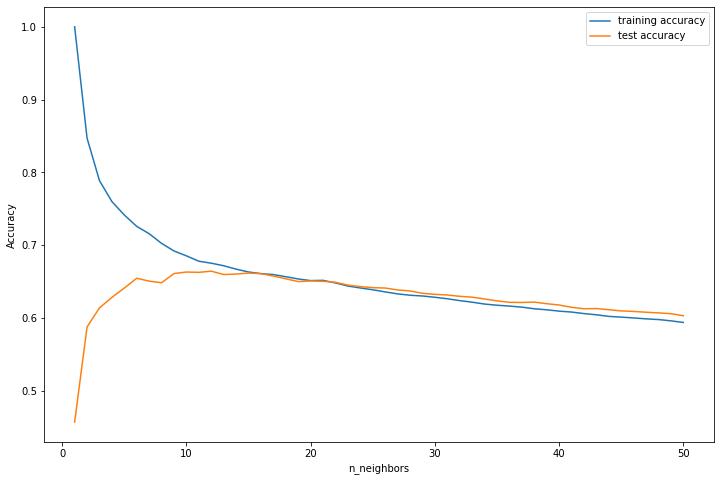

In [40]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [41]:
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 12


In [42]:
# INSTANTIATING a model with the optimal number of neighbors
#opt neighbors to helop create more accuracy
knn_opt = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_opt_fit = knn_opt.fit(X_train, y_train)



# PREDITCING on new data
knn_opt_pred = knn_opt.predict(X_test)



# SCORING the results
print('KNN Training Score:', knn_opt.score(X_train, y_train).round(4))
print('KNN Testing Score :',  knn_opt.score(X_test, y_test).round(4))


# saving scoring data for future use
knn_opt_score_train = knn_opt.score(X_train, y_train).round(4)
knn_opt_score_test  = knn_opt.score(X_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_opt_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

KNN Training Score: 0.6753
KNN Testing Score : 0.6644
KNN Train-Test Gap: 0.5429


In [43]:
#train test split for a different data set
X_train_STAND, X_test_STAND, y_train_STAND, y_test_STAND = train_test_split(
            X_scaled_df,
            log_chef_target,
            test_size = 0.25,
            random_state = 219)

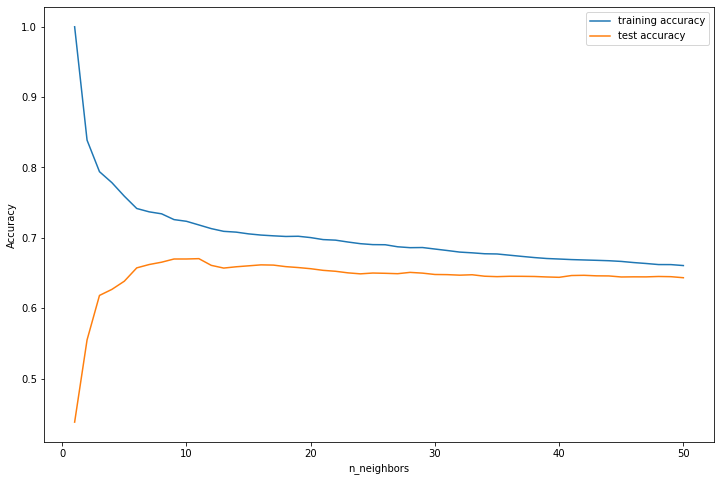

The optimal number of neighbors is 11


In [44]:
#Knn stand model
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train_STAND, y_train_STAND)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train_STAND, y_train_STAND))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test_STAND, y_test_STAND))


# plotting the visualization to help with neighbor value
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy,     label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

In [45]:
# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                   n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_stand_fit = knn_stand.fit(X_train_STAND, y_train_STAND)



# PREDITCING on new data
knn_stand_pred = knn_stand.predict(X_test_STAND)



# SCORING the results
print('KNN Training Score:', knn_stand.score(X_train_STAND, y_train_STAND).round(4))
print('KNN Testing Score :',  knn_stand.score(X_test_STAND, y_test_STAND).round(4))


# saving scoring data for future use
knn_stand_score_train = knn_stand.score(X_train_STAND, y_train_STAND).round(4)
knn_stand_score_test  = knn_stand.score(X_test_STAND, y_test_STAND).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_stand_score_train - knn_stand_score_test).round(4))
knn_stand_test_gap = abs(knn_stand_score_train - knn_stand_score_test).round(4)




KNN Training Score: 0.7184
KNN Testing Score : 0.6704
KNN Train-Test Gap: 0.048


In [46]:
# comparing results

print(f"""
KNN Model             Neighbors     Train Score      Test Score
----------------      ---------     ----------       ----------
Non-Standardized      1             {knn_reg_score_train}              {knn_reg_score_test}
Non-Standardized      12            {knn_opt_score_train}            {knn_opt_score_test}
Standardized          11             {knn_stand_score_train}           {knn_stand_score_test}
""")


# creating a dictionary for model results
model_performance_knn = {
    
    'Model Type'    : ['KNN_Not_Standardized', 'KNN_Not_Standardized_Opt', 'KNN_Standardized_Opt'],
           
    
    'Training' : [knn_reg_score_train,
                  knn_opt_score_train,
                  knn_stand_score_train],
           
    
    'Testing'  : [knn_reg_score_test,
                  knn_opt_score_test,
                  knn_stand_score_test],
                    
    
    'Train-Test Gap' : [knn_reg_test_gap,
                        knn_opt_test_gap,
                        knn_stand_test_gap],
                   
    
    'Model Size' : ["NA", " NA", " NA"],
                    
    'Model'      : ["NA", "NA", "NA"] }


KNN Model             Neighbors     Train Score      Test Score
----------------      ---------     ----------       ----------
Non-Standardized      1             1.0              0.4571
Non-Standardized      12            0.6753            0.6644
Standardized          11             0.7184           0.6704



In [47]:
# converting model_performance into a DataFrame
model_performance_knn = pd.DataFrame(model_performance_knn)


# concatenating with former performance DataFrame
total_performance = pd.concat([model_performance_chef, model_performance_knn],
                              axis = 0)


total_performance.sort_values(by = 'Testing',
                              ascending = False)


# sending model results to Excel
total_performance.to_excel('./linear_model_performance_chef.xlsx',
                           index = False)


# checking the results
total_performance

#print(f"""The top model  is OLS""")

,Model Type,Training,Testing,Train-Test Gap,Model Size,Model
0,OLS,0.7728,0.7727,0.0001,20,"[(intercept, 2.2), (CROSS_SELL_SUCCESS, -0.02)..."
1,Lasso,0.5231,0.5565,0.0001,42,"[(intercept, 2.95), (CROSS_SELL_SUCCESS, -0.0)..."
2,ARD,0.7290,0.7194,0.0096,42,"[(intercept, 2.44), (CROSS_SELL_SUCCESS, -0.01..."
0,KNN_Not_Standardized,1.0000,0.4571,0.5429,NA,NA
1,KNN_Not_Standardized_Opt,0.6753,0.6644,0.5429,NA,NA
2,KNN_Standardized_Opt,0.7184,0.6704,0.0480,NA,NA
